In [144]:
import pandas as pd
import requests
from IPython.display import clear_output
import matplotlib.pyplot as plt
import scipy.stats as st

In [98]:
cdf = pd.read_csv('/Users/joelox87/opt/anaconda3/envs/DataBootCamp/GroupProject_1/Clinical.csv')

In [99]:
cdf.head()

In [72]:
states = ['CA','TX','NY','FL','OH','OR','MO','AZ','MN','MD']
#states = ['AL','AK','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY']
state_names = {'AZ':'Arizona','CA':'California','FL':'Florida','MD':'Maryland','MN':'Minnesota','MO':'Missouri','NY':'New York','OH':'Ohio','OR':'Oregon','TX':'Texas'}
#state_names = {'AL':'Alabama','AK':'Alaska','AZ':'Arizona','AR':'Arkansas','CA':'California','CO':'Colorado','CT':'Conneticut','DE':'Delaware','FL':'Florida','GA':'Georgia','HI':'Hawaii','ID':'Idaho','IL':'Illinois','IN':'Indiana','IA':'Iowa','KS':'Kansas','KY':'Kentucky','LA':'Louisiana','ME':'Maine','MD':'Maryland','MA':'Massachussetts','MI':'Michigan','MN':'Minnesota','MS':'Mississippi','MO':'Missouri','MT':'Montana','NE':'Nebraska','NV':'Nevada','NH':'New Hampshire','NJ':'New Jersey','NM':'New Mexico','NY':'New York','NC':'North Carolina','ND':'North Dakota','OH':'Ohio','OK':'Oklahoma','OR':'Oregon','PA':'Pennsylvania','RI':'Rhode Island','SC':'South Carolina','SD':'South Dakota','TN':'Tennessee','TX':'Texas','UT':'Utah','VT':'Vermont','VA':'Virginia','WA':'Washington','WV':'West Virgiania','WI':'Wisconsin','WY':'Wyoming','PR':'Puerto Rico'}

unique_states = df['REGION'].unique()
print(unique_states)

['Alabama' 'Arizona' 'Arkansas' 'California' 'Colorado' 'Connecticut'
 'Delaware' 'Georgia' 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa'
 'Kansas' 'Kentucky' 'Louisiana' 'Maryland' 'Massachusetts' 'Michigan'
 'Minnesota' 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'New Hampshire'
 'New Mexico' 'New York' 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma'
 'Oregon' 'Pennsylvania' 'South Carolina' 'South Dakota' 'Tennessee'
 'Texas' 'Utah' 'Vermont' 'Virginia' 'Washington' 'West Virginia'
 'Wisconsin' 'Puerto Rico' 'Nevada' 'Maine' 'Alaska' 'Wyoming']


In [85]:

#state_names = {'MO':'MISSOURI', 'IL':'ILLINOIS', 'IA':'IOWA', 'KS':'KANSAS', 'TX':'TEXAS'}
#state_stations = {}
stations = []
for state in states:
    print(state)
    #state_stations[state] = []
    response = requests.get(f'https://www.ncdc.noaa.gov//homr/services/station/search?state={state}&platform=ASOS')
    response_json = response.json()
    station_collection = response_json['stationCollection']['stations']
    #print(station_collection[0])
    #pull the first 10 stations from each state
    for station in station_collection[0:5]:
        #state_name = state_names[state]
        station_id = station['identifiers'][0]['id']
        stations.append(station_id)
    clear_output(wait=True)

    #break

MD


In [100]:
#def get_data(year,stations):
url = 'https://www.ncei.noaa.gov/access/services/data/v1'
    
params = {
        'dataset':'daily-summaries',
        'startDate':f'2016-09-22',
        'endDate':f'2020-09-22',
        'format':'json',
        'includeStationLocation':1,
        'units':'standard',
        'stations':stations
}
    
response = requests.get(url, params)
response_json = response.json()

In [101]:
wdf = pd.DataFrame(response_json)

In [102]:
wdf.head()

,WSF2,STATION,WSF5,LONGITUDE,ELEVATION,PRCP,DATE,WDF2,AWND,WDF5,...,WT05,WT07,WT06,WT04,WT10,WT09,WDFG,WSFG,PSUN,TSUN
0,21.0,USW00023191,25.1,-118.41583,488.3,0.00,2016-09-22,260,10.96,270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,16.1,USW00023191,19.0,-118.41583,488.3,0.00,2016-09-23,240,7.16,260,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16.1,USW00023191,19.0,-118.41583,488.3,0.00,2016-09-24,260,7.83,310,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,19.9,USW00023191,27.1,-118.41583,488.3,0.00,2016-09-25,90,8.72,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13.0,USW00023191,16.1,-118.41583,488.3,0.00,2016-09-26,110,7.61,120,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
wdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71528 entries, 0 to 71527
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   WSF2       71301 non-null  object
 1   STATION    71528 non-null  object
 2   WSF5       70926 non-null  object
 3   LONGITUDE  71528 non-null  object
 4   ELEVATION  71528 non-null  object
 5   PRCP       71184 non-null  object
 6   DATE       71528 non-null  object
 7   WDF2       71301 non-null  object
 8   AWND       71187 non-null  object
 9   WDF5       70924 non-null  object
 10  PGTM       13526 non-null  object
 11  TMAX       71220 non-null  object
 12  TMIN       71216 non-null  object
 13  LATITUDE   71528 non-null  object
 14  WT02       3683 non-null   object
 15  WT08       7456 non-null   object
 16  WT01       22332 non-null  object
 17  SNOW       27916 non-null  object
 18  SNWD       28283 non-null  object
 19  WT03       6835 non-null   object
 20  TAVG       23371 non-null  o

In [104]:
wdf = wdf.iloc[:,0:14]
wdf = wdf.drop(columns='PGTM')
wdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71528 entries, 0 to 71527
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   WSF2       71301 non-null  object
 1   STATION    71528 non-null  object
 2   WSF5       70926 non-null  object
 3   LONGITUDE  71528 non-null  object
 4   ELEVATION  71528 non-null  object
 5   PRCP       71184 non-null  object
 6   DATE       71528 non-null  object
 7   WDF2       71301 non-null  object
 8   AWND       71187 non-null  object
 9   WDF5       70924 non-null  object
 10  TMAX       71220 non-null  object
 11  TMIN       71216 non-null  object
 12  LATITUDE   71528 non-null  object
dtypes: object(13)
memory usage: 7.1+ MB


In [105]:
wdf = wdf.dropna(how='any')

In [106]:
wdf.to_csv('/Users/joelox87/opt/anaconda3/envs/DataBootCamp/GroupProject_1/WeatherExport_326b.csv', index=False)

In [107]:
wdf = wdf.reset_index(drop=True)

In [108]:
wdf['WSF2'] = wdf['WSF2'].astype('float')
wdf['WSF5'] = wdf['WSF5'].astype('float')
wdf['LONGITUDE'] = wdf['LONGITUDE'].astype('float')
wdf['ELEVATION'] = wdf['ELEVATION'].astype('float')
wdf['PRCP'] = wdf['PRCP'].astype('float')
wdf['DATE'] = pd.to_datetime(wdf['DATE'])
wdf['WDF2'] = wdf['WDF2'].astype('int')
wdf['AWND'] = wdf['AWND'].astype('float')
wdf['WDF5'] = wdf['WDF5'].astype('int')
wdf['TMAX'] = wdf['TMAX'].astype('int')
wdf['TMIN'] = wdf['TMIN'].astype('int')
wdf['LATITUDE'] = wdf['LATITUDE'].astype('float')

In [109]:
wdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70387 entries, 0 to 70386
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   WSF2       70387 non-null  float64       
 1   STATION    70387 non-null  object        
 2   WSF5       70387 non-null  float64       
 3   LONGITUDE  70387 non-null  float64       
 4   ELEVATION  70387 non-null  float64       
 5   PRCP       70387 non-null  float64       
 6   DATE       70387 non-null  datetime64[ns]
 7   WDF2       70387 non-null  int64         
 8   AWND       70387 non-null  float64       
 9   WDF5       70387 non-null  int64         
 10  TMAX       70387 non-null  int64         
 11  TMIN       70387 non-null  int64         
 12  LATITUDE   70387 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(4), object(1)
memory usage: 7.0+ MB


In [110]:
wdf.head()

,WSF2,STATION,WSF5,LONGITUDE,ELEVATION,PRCP,DATE,WDF2,AWND,WDF5,TMAX,TMIN,LATITUDE
0,21.0,USW00023191,25.1,-118.41583,488.3,0.0,2016-09-22,260,10.96,270,68,58,33.405
1,16.1,USW00023191,19.0,-118.41583,488.3,0.0,2016-09-23,240,7.16,260,74,59,33.405
2,16.1,USW00023191,19.0,-118.41583,488.3,0.0,2016-09-24,260,7.83,310,85,69,33.405
3,19.9,USW00023191,27.1,-118.41583,488.3,0.0,2016-09-25,90,8.72,80,93,76,33.405
4,13.0,USW00023191,16.1,-118.41583,488.3,0.0,2016-09-26,110,7.61,120,97,80,33.405


In [111]:
column_dict = {
    'WSF2':'Fastest 2-minute wind speed (MPH)',
    'WSF5':'Fastest 5-minute wind speed (MPH)',
    'PRCP':'Precipitation (Inches)',
    'WDF2':'Direction of fastest 2-minute wind speed',
    'WDF5':'Direction of fastest 5-minute wind speed',
    'AWND':'Average daily wind speed (MPH)',
    'TMAX':'Maximum temperature (F)',
    'TMIN':'Minimum temperature (F)'
}
wdf = wdf.rename(columns=column_dict)

In [112]:
wdf.head()

,Fastest 2-minute wind speed (MPH),STATION,Fastest 5-minute wind speed (MPH),LONGITUDE,ELEVATION,Precipitation (Inches),DATE,Direction of fastest 2-minute wind speed,Average daily wind speed (MPH),Direction of fastest 5-minute wind speed,Maximum temperature (F),Minimum temperature (F),LATITUDE
0,21.0,USW00023191,25.1,-118.41583,488.3,0.0,2016-09-22,260,10.96,270,68,58,33.405
1,16.1,USW00023191,19.0,-118.41583,488.3,0.0,2016-09-23,240,7.16,260,74,59,33.405
2,16.1,USW00023191,19.0,-118.41583,488.3,0.0,2016-09-24,260,7.83,310,85,69,33.405
3,19.9,USW00023191,27.1,-118.41583,488.3,0.0,2016-09-25,90,8.72,80,93,76,33.405
4,13.0,USW00023191,16.1,-118.41583,488.3,0.0,2016-09-26,110,7.61,120,97,80,33.405


In [113]:
wdf.to_csv('aggregated_weather2.csv', index=False)

In [114]:
wdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70387 entries, 0 to 70386
Data columns (total 13 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Fastest 2-minute wind speed (MPH)         70387 non-null  float64       
 1   STATION                                   70387 non-null  object        
 2   Fastest 5-minute wind speed (MPH)         70387 non-null  float64       
 3   LONGITUDE                                 70387 non-null  float64       
 4   ELEVATION                                 70387 non-null  float64       
 5   Precipitation (Inches)                    70387 non-null  float64       
 6   DATE                                      70387 non-null  datetime64[ns]
 7   Direction of fastest 2-minute wind speed  70387 non-null  int64         
 8   Average daily wind speed (MPH)            70387 non-null  float64       
 9   Direction of fastest 5-minut

In [129]:
#print(stations)
#['CA','TX','NY','FL','OH','OR','MO','AZ','MN','MD']
station_ids = wdf['STATION']
station_states = []
for station_id in station_ids:
    if station_id in stations[0:5]:
        station_states.append('California')
    elif station_id in stations[5:10]:
        station_states.append('Texas')
    elif station_id in stations[10:15]:
        station_states.append('New York')
    elif station_id in stations[15:20]:
        station_states.append('Florida')
    elif station_id in stations[20:25]:
        station_states.append('Ohio')
    elif station_id in stations[25:30]:
        station_states.append('Oregon')
    elif station_id in stations[30:35]:
        station_states.append('Missouri')
    elif station_id in stations[35:40]:
        station_states.append('Arizona')
    elif station_id in stations[40:45]:
        station_states.append('Minnesota')
    elif station_id in stations[45:50]:
        station_states.append('Maryland')
wdf['REGION'] = station_states

In [130]:
wdf.head()

,Fastest 2-minute wind speed (MPH),STATION,Fastest 5-minute wind speed (MPH),LONGITUDE,ELEVATION,Precipitation (Inches),DATE,Direction of fastest 2-minute wind speed,Average daily wind speed (MPH),Direction of fastest 5-minute wind speed,Maximum temperature (F),Minimum temperature (F),LATITUDE,STATE,YEAR,REGION
0,21.0,USW00023191,25.1,-118.41583,488.3,0.0,2016-09-22,260,10.96,270,68,58,33.405,CA,2016,California
1,16.1,USW00023191,19.0,-118.41583,488.3,0.0,2016-09-23,240,7.16,260,74,59,33.405,CA,2016,California
2,16.1,USW00023191,19.0,-118.41583,488.3,0.0,2016-09-24,260,7.83,310,85,69,33.405,CA,2016,California
3,19.9,USW00023191,27.1,-118.41583,488.3,0.0,2016-09-25,90,8.72,80,93,76,33.405,CA,2016,California
4,13.0,USW00023191,16.1,-118.41583,488.3,0.0,2016-09-26,110,7.61,120,97,80,33.405,CA,2016,California


In [131]:
wdf['YEAR'] = [d.strftime('%Y') for d in wdf['DATE']]
wdf.head()

,Fastest 2-minute wind speed (MPH),STATION,Fastest 5-minute wind speed (MPH),LONGITUDE,ELEVATION,Precipitation (Inches),DATE,Direction of fastest 2-minute wind speed,Average daily wind speed (MPH),Direction of fastest 5-minute wind speed,Maximum temperature (F),Minimum temperature (F),LATITUDE,STATE,YEAR,REGION
0,21.0,USW00023191,25.1,-118.41583,488.3,0.0,2016-09-22,260,10.96,270,68,58,33.405,CA,2016,California
1,16.1,USW00023191,19.0,-118.41583,488.3,0.0,2016-09-23,240,7.16,260,74,59,33.405,CA,2016,California
2,16.1,USW00023191,19.0,-118.41583,488.3,0.0,2016-09-24,260,7.83,310,85,69,33.405,CA,2016,California
3,19.9,USW00023191,27.1,-118.41583,488.3,0.0,2016-09-25,90,8.72,80,93,76,33.405,CA,2016,California
4,13.0,USW00023191,16.1,-118.41583,488.3,0.0,2016-09-26,110,7.61,120,97,80,33.405,CA,2016,California


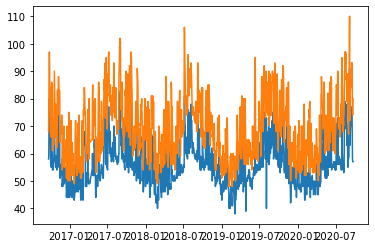

In [132]:
station = wdf['STATION'].unique()[0]
weather_to_graph = wdf.loc[(wdf['STATION'] == station)]
max_temp = weather_to_graph['Maximum temperature (F)']
min_temp = weather_to_graph['Minimum temperature (F)']
dates = weather_to_graph['DATE']

plt.plot(dates,min_temp)
plt.plot(dates,max_temp)

In [127]:
wdf = wdf.drop(columns='year')
wdf.head()

,Fastest 2-minute wind speed (MPH),STATION,Fastest 5-minute wind speed (MPH),LONGITUDE,ELEVATION,Precipitation (Inches),DATE,Direction of fastest 2-minute wind speed,Average daily wind speed (MPH),Direction of fastest 5-minute wind speed,Maximum temperature (F),Minimum temperature (F),LATITUDE,STATE,YEAR
0,21.0,USW00023191,25.1,-118.41583,488.3,0.0,2016-09-22,260,10.96,270,68,58,33.405,CA,2016
1,16.1,USW00023191,19.0,-118.41583,488.3,0.0,2016-09-23,240,7.16,260,74,59,33.405,CA,2016
2,16.1,USW00023191,19.0,-118.41583,488.3,0.0,2016-09-24,260,7.83,310,85,69,33.405,CA,2016
3,19.9,USW00023191,27.1,-118.41583,488.3,0.0,2016-09-25,90,8.72,80,93,76,33.405,CA,2016
4,13.0,USW00023191,16.1,-118.41583,488.3,0.0,2016-09-26,110,7.61,120,97,80,33.405,CA,2016


In [133]:
wdf.to_csv('aggregated_weather2.csv', index=False)

In [134]:
#Weather and Flu Data paths
weather_path = "aggregated_weather2.csv"
flu_path = "clinical.csv"

#read datasets
weather_data = pd.read_csv("aggregated_weather2.csv")
flu_data = pd.read_csv("clinical.csv")

#combine datasets by REGION
combined_datasets = pd.merge(weather_data, flu_data, on=["REGION","YEAR")

#display combined datasets
combined_datasets

,Fastest 2-minute wind speed (MPH),STATION,Fastest 5-minute wind speed (MPH),LONGITUDE,ELEVATION,Precipitation (Inches),DATE,Direction of fastest 2-minute wind speed,Average daily wind speed (MPH),Direction of fastest 5-minute wind speed,...,REGION,WEEK,YEAR_y,TOTAL,TOTAL A,TOTAL B,PERCENT POSITIVE,PERCENT A,PERCENT B,SEASON
0,21.0,USW00023191,25.1,-118.41583,488.3,0.0,2016-09-22,260,10.96,270,...,California,40,2016,668.0,2.0,0.0,0.30,0.30,0.00,FALL
1,21.0,USW00023191,25.1,-118.41583,488.3,0.0,2016-09-22,260,10.96,270,...,California,41,2016,708.0,5.0,0.0,0.71,0.71,0.00,FALL
2,21.0,USW00023191,25.1,-118.41583,488.3,0.0,2016-09-22,260,10.96,270,...,California,42,2016,719.0,3.0,2.0,0.70,0.42,0.28,FALL
3,21.0,USW00023191,25.1,-118.41583,488.3,0.0,2016-09-22,260,10.96,270,...,California,43,2016,698.0,9.0,2.0,1.58,1.29,0.29,FALL
4,21.0,USW00023191,25.1,-118.41583,488.3,0.0,2016-09-22,260,10.96,270,...,California,44,2016,728.0,9.0,0.0,1.24,1.24,0.00,FALL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13034419,17.0,USW00093786,21.9,-75.12389,3.7,0.0,2020-09-22,330,8.28,340,...,Maryland,35,2020,29.0,0.0,0.0,0.00,0.00,0.00,SUMMER
13034420,17.0,USW00093786,21.9,-75.12389,3.7,0.0,2020-09-22,330,8.28,340,...,Maryland,36,2020,24.0,0.0,0.0,0.00,0.00,0.00,SUMMER
13034421,17.0,USW00093786,21.9,-75.12389,3.7,0.0,2020-09-22,330,8.28,340,...,Maryland,37,2020,28.0,0.0,0.0,0.00,0.00,0.00,SUMMER
13034422,17.0,USW00093786,21.9,-75.12389,3.7,0.0,2020-09-22,330,8.28,340,...,Maryland,38,2020,40.0,0.0,0.0,0.00,0.00,0.00,FALL


In [177]:
#weather_data.info()
import datetime
weather_data['DATE'] = pd.to_datetime(weather_data['DATE'])
weather_dates = weather_data['DATE']
season = []
for wdate in weather_dates:
    week = int(datetime.datetime.strftime(wdate, '%W'))
    if week >= 51:
        season.append('WINTER')
    elif week >= 38:
        season.append('FALL')
    elif week >= 25:
        season.append('SUMMER')
    elif week >= 12:
        season.append('SPRING')
    elif week >=0:
        season.append('WINTER')
weather_data['SEASON'] = season

In [178]:
weather_data.head()


,Fastest 2-minute wind speed (MPH),STATION,Fastest 5-minute wind speed (MPH),LONGITUDE,ELEVATION,Precipitation (Inches),DATE,Direction of fastest 2-minute wind speed,Average daily wind speed (MPH),Direction of fastest 5-minute wind speed,Maximum temperature (F),Minimum temperature (F),LATITUDE,STATE,YEAR,REGION,SEASON
0,21.0,USW00023191,25.1,-118.41583,488.3,0.0,2016-09-22,260,10.96,270,68,58,33.405,CA,2016,California,FALL
1,16.1,USW00023191,19.0,-118.41583,488.3,0.0,2016-09-23,240,7.16,260,74,59,33.405,CA,2016,California,FALL
2,16.1,USW00023191,19.0,-118.41583,488.3,0.0,2016-09-24,260,7.83,310,85,69,33.405,CA,2016,California,FALL
3,19.9,USW00023191,27.1,-118.41583,488.3,0.0,2016-09-25,90,8.72,80,93,76,33.405,CA,2016,California,FALL
4,13.0,USW00023191,16.1,-118.41583,488.3,0.0,2016-09-26,110,7.61,120,97,80,33.405,CA,2016,California,FALL


In [179]:
x = weather_data.groupby(["REGION","YEAR","SEASON"])

In [180]:
x_sum = x.sum()
x_sum.head()

Fastest 2-minute wind speed (MPH)  \
REGION  YEAR SEASON                                      
Arizona 2016 FALL                               6818.7   
             WINTER                              857.9   
        2017 FALL                               6864.4   
             SPRING                             8461.9   
             SUMMER                             8046.4   

                     Fastest 5-minute wind speed (MPH)    LONGITUDE  \
REGION  YEAR SEASON                                                   
Arizona 2016 FALL                               8911.5 -38939.05520   
             WINTER                             1091.8  -5802.06536   
        2017 FALL                               9043.2 -40281.92003   
             SPRING                            11291.1 -40614.45752   
             SUMMER                            10644.7 -40503.61169   

                     ELEVATION  Precipitation (Inches)  \
REGION  YEAR SEASON                                      
Arizona 2016 FALL     522117.9                    7.02   
             WINTER    78023.4                    5.65   
        2017 FALL     542568.3                    0.64   
             SPRING   546163.8                    4.16   
             SUMMER   544965.3                   22.94   

                     Direction of fastest 2-minute wind speed  \
REGION  YEAR SEASON                                             
Arizona 2016 FALL                                       71680   
             WINTER                                      9780   
        2017 FALL                                       77000   
             SPRING                                     85090   
             SUMMER                                     67630   

                     Average daily wind speed (MPH)  \
REGION  YEAR SEASON                                   
Arizona 2016 FALL                           2430.83   
             WINTER                          317.88   
        2017 FALL                           2448.01   
             SPRING                         3159.22   
             SUMMER                         2395.98   

                     Direction of fastest 5-minute wind speed  \
REGION  YEAR SEASON                                             
Arizona 2016 FALL                                       71950   
             WINTER                                      9450   
        2017 FALL                                       78590   
             SPRING                                     86300   
             SUMMER                                     67710   

                     Maximum temperature (F)  Minimum temperature (F)  \
REGION  YEAR SEASON                                                     
Arizona 2016 FALL                      24467                    13290   
             WINTER                     2745                     1488   
        2017 FALL                      26315                    13263   
             SPRING                    28638                    15322   
             SUMMER                    33391                    21980   

                        LATITUDE  
REGION  YEAR SEASON               
Arizona 2016 FALL    11960.74303  
             WINTER   1782.85861  
        2017 FALL    12385.74778  
             SPRING  12480.01027  
             SUMMER  12448.58944

In [183]:

x_temp = pd.DataFrame(x.mean()["Maximum temperature (F)"])
x_temp.head()

Maximum temperature (F)
REGION  YEAR SEASON                         
Arizona 2016 FALL                  70.106017
             WINTER                52.788462
        2017 FALL                  72.894737
             SPRING                78.675824
             SUMMER                91.986226

In [190]:
y = flu_data.groupby(["REGION","YEAR","SEASON"])
y_sum = pd.DataFrame(y.sum()["TOTAL"])
y_sum.head()

TOTAL
REGION  YEAR SEASON        
Alabama 2016 FALL    6685.0
             WINTER  1959.0
        2017 FALL    7361.0
             SPRING  5707.0
             SUMMER  2666.0

In [191]:
y_sum = y_sum.reset_index()
y_sum.head()

,REGION,YEAR,SEASON,TOTAL
0,Alabama,2016,FALL,6685.0
1,Alabama,2016,WINTER,1959.0
2,Alabama,2017,FALL,7361.0
3,Alabama,2017,SPRING,5707.0
4,Alabama,2017,SUMMER,2666.0


In [185]:
x_temp_df = x_temp.reset_index()
x_temp_df.head()

,REGION,YEAR,SEASON,Maximum temperature (F)
0,Arizona,2016,FALL,70.106017
1,Arizona,2016,WINTER,52.788462
2,Arizona,2017,FALL,72.894737
3,Arizona,2017,SPRING,78.675824
4,Arizona,2017,SUMMER,91.986226


In [192]:
#combine datasets by REGION
combined_datasets = pd.merge(x_temp_df, y_sum, on=["REGION","YEAR","SEASON"])

#display combined datasets
combined_datasets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 0 to 161
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   REGION                   162 non-null    object 
 1   YEAR                     162 non-null    int64  
 2   SEASON                   162 non-null    object 
 3   Maximum temperature (F)  162 non-null    float64
 4   TOTAL                    162 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 7.6+ KB


In [193]:
combined_datasets.head()

,REGION,YEAR,SEASON,Maximum temperature (F),TOTAL
0,Arizona,2016,FALL,70.106017,1784.0
1,Arizona,2016,WINTER,52.788462,519.0
2,Arizona,2017,FALL,72.894737,2774.0
3,Arizona,2017,SPRING,78.675824,3048.0
4,Arizona,2017,SUMMER,91.986226,1341.0


In [209]:
season_num = combined_datasets['SEASON']
season_num_list = []
for season in season_num:
    if season == "SPRING":
        season_num_list.append('1')
    elif season == "SUMMER":
        season_num_list.append('2')
    elif season == "FALL":
        season_num_list.append('3')
    elif season == "WINTER":
        season_num_list.append('4')
combined_datasets['SEASON_NUM'] = season_num_list

In [213]:
combined_datasets["YEAR"] = combined_datasets["YEAR"].astype(str)
combined_datasets["SEASON_YEAR"] = combined_datasets["YEAR"]+'-'+combined_datasets["SEASON_NUM"]
combined_datasets.head()



,REGION,YEAR,SEASON,Maximum temperature (F),TOTAL,SEASON_YEAR,SEASON_NUM
133,Oregon,2018,SPRING,66.426667,3146.0,2018-1,1
93,New York,2017,SPRING,65.072848,22513.0,2017-1,1
141,Oregon,2020,SPRING,66.239560,11771.0,2020-1,1
25,California,2018,SPRING,82.170022,9418.0,2018-1,1
83,Missouri,2019,SPRING,74.623894,12902.0,2019-1,1


In [215]:
combined_datasets = combined_datasets.sort_values("SEASON_YEAR")
combined_datasets.head()

,REGION,YEAR,SEASON,Maximum temperature (F),TOTAL,SEASON_YEAR,SEASON_NUM
90,New York,2016,FALL,56.752315,17675.0,2016-3,3
108,Ohio,2016,FALL,60.102740,13385.0,2016-3,3
36,Maryland,2016,FALL,62.169374,1304.0,2016-3,3
126,Oregon,2016,FALL,55.675862,3442.0,2016-3,3
72,Missouri,2016,FALL,64.940503,7028.0,2016-3,3


In [216]:
#['CA','TX','NY','FL','OH','OR','MO','AZ','MN','MD']
CA = combined_datasets.loc[combined_datasets["REGION"]=="California"]
TX = combined_datasets.loc[combined_datasets["REGION"]=="Texas"]
NY = combined_datasets.loc[combined_datasets["REGION"]=="New York"]
FL = combined_datasets.loc[combined_datasets["REGION"]=="Florida"]
OH = combined_datasets.loc[combined_datasets["REGION"]=="Ohio"]
OR = combined_datasets.loc[combined_datasets["REGION"]=="Oregon"]
MO = combined_datasets.loc[combined_datasets["REGION"]=="Missouri"]
AZ = combined_datasets.loc[combined_datasets["REGION"]=="Arizona"]
MN = combined_datasets.loc[combined_datasets["REGION"]=="Minnesota"]
MD = combined_datasets.loc[combined_datasets["REGION"]=="Maryland"]


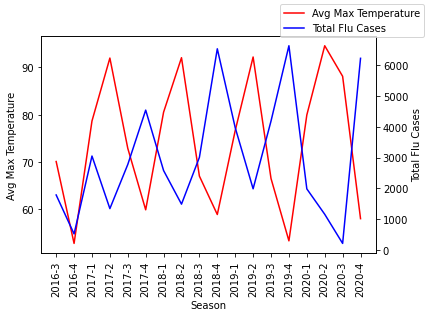

In [217]:
fig, ax1 = plt.subplots()
ax1.plot(AZ["SEASON_YEAR"],AZ["Maximum temperature (F)"],label='Avg Max Temperature', color='red')
ax1.set_xlabel("Season")
ax1.set_ylabel("Avg Max Temperature")
ax2 = ax1.twinx()
ax2.plot(AZ["SEASON_YEAR"],AZ["TOTAL"],label='Total Flu Cases', color='blue')
ax2.set_ylabel("Total Flu Cases")
legend = fig.legend()
ax1.tick_params(axis='x', rotation=90)
